# Canada Refugee Statistics Exploratory Data Analysis

In this project we perform Exploratory Data Analysis **(EDA)** on **UNHCR Refugee Statistics** for **Canada** from **2012-2022.**


_Original dataset can be downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) website._

## Analysis Questions

1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

## Important Distinction: Refugees vs. Asylum Seekers

**The 1951 Refugee Convention defines a refugee as:** “A person who, owing to a well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his nationality and is unable or, owing to such fear, unwilling to avail himself of the protection of that country”.
> - In this data set, UNHCR-Refugees refers to people who have been resettled to Canada, and arrive to the country as permanent residents.
    
**An asylum seeker (or claimant) on the other hand is defined as** someone who is seeking international protection but has not yet been granted refugee status. 
> - In this data set, asylum-seeker refers to someone who has arrived in Canada as a visitor, worker, student, etc., through official or unofficial ports of entry, and who applied for protection from within Canada (after arrival). 

_For more information and definitions, visit the [unhcr.ca](https://www.unhcr.ca/about-us/frequently-asked-questions/#:~:text=An%20asylum%2Dseeker%20is%20someone,yet%20been%20granted%20refugee%20status.) website._

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading, Exploring and Preparing Data
3. **Step 3:** Exploratory Data Analysis + Visualization
4. **2012- 2022 Canada Refugee Statistics EDA Results Summary**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')

In [2]:
# vload dataset into pandas DataFrame

df = pd.read_csv('can-stats-2012-22.csv')

 

In [3]:
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


In [4]:
df.shape

(1870, 5)

In [5]:
df.dtypes

Year                  int64
Country-of-origin    object
UNHCR-refugees        int64
Asylum-seekers        int64
total-count           int64
dtype: object

In [6]:
df.describe()

,Year,UNHCR-refugees,Asylum-seekers,total-count
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,2016.955615,752.438503,323.139572,1075.578075
std,3.167123,2427.738942,1181.143362,2980.751399
min,2012.000000,0.000000,0.000000,0.000000
25%,2014.000000,20.000000,7.000000,39.250000
50%,2017.000000,124.000000,36.000000,187.000000
75%,2020.000000,563.750000,195.250000,889.750000
max,2022.000000,75098.000000,19765.000000,75294.000000


In [7]:
# checking for missing values
df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
df.info

<bound method DataFrame.info of       Year                   Country-of-origin  UNHCR-refugees  \
0     2012                         Afghanistan            2609   
1     2012                             Albania            1764   
2     2012                             Algeria             513   
3     2012                              Angola             753   
4     2012                 Antigua and Barbuda              40   
...    ...                                 ...             ...   
1865  2022  Venezuela (Bolivarian Republic of)            1497   
1866  2022                      Western Sahara               5   
1867  2022                               Yemen             450   
1868  2022                              Zambia              23   
1869  2022                            Zimbabwe             309   

      Asylum-seekers  total-count  
0                411         3020  
1                579         2343  
2                284          797  
3                 21          7

# EDA 

# From which countries has Canada admitted the highest number of refugees?

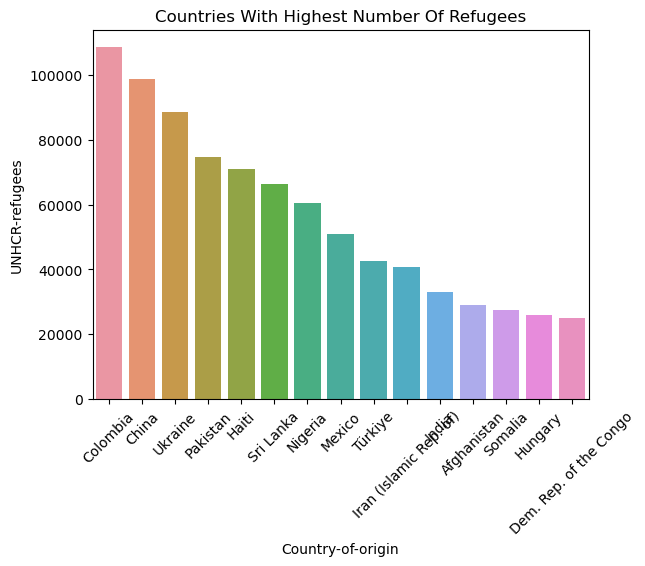

In [30]:



top_refugees_countries= df['UNHCR-refugees'].groupby(by= df['Country-of-origin']).sum().sort_values(ascending=False)[0:15].reset_index()


sns.barplot(x='Country-of-origin', y= 'UNHCR-refugees', data=top_refugees_countries)
plt.title('Countries With Highest Number Of Refugees')
plt.xlabel('Country-of-origin')
plt.ylabel('UNHCR-refugees')
plt.xticks(rotation= 45)
plt.show()

In [11]:
# What are the total number of resettled refugees in Canada per year?
total_refugees = df['UNHCR-refugees'].groupby(by= df['Year']).sum().sort_values(ascending=False).reset_index()
total_refugees

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


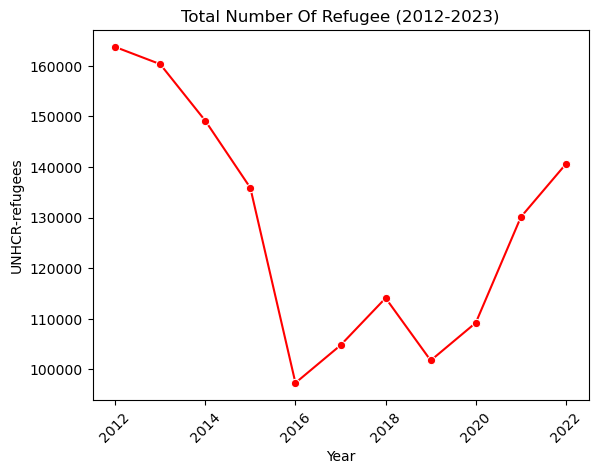

In [32]:
sns.lineplot( x='Year', y= 'UNHCR-refugees', data= total_refugees, marker='o', color='red')
plt.title('Total Number Of Refugee (2012-2023)')
plt.xlabel('Year')
plt.ylabel('UNHCR-refugees')
plt.xticks(rotation= 45)
plt.show()

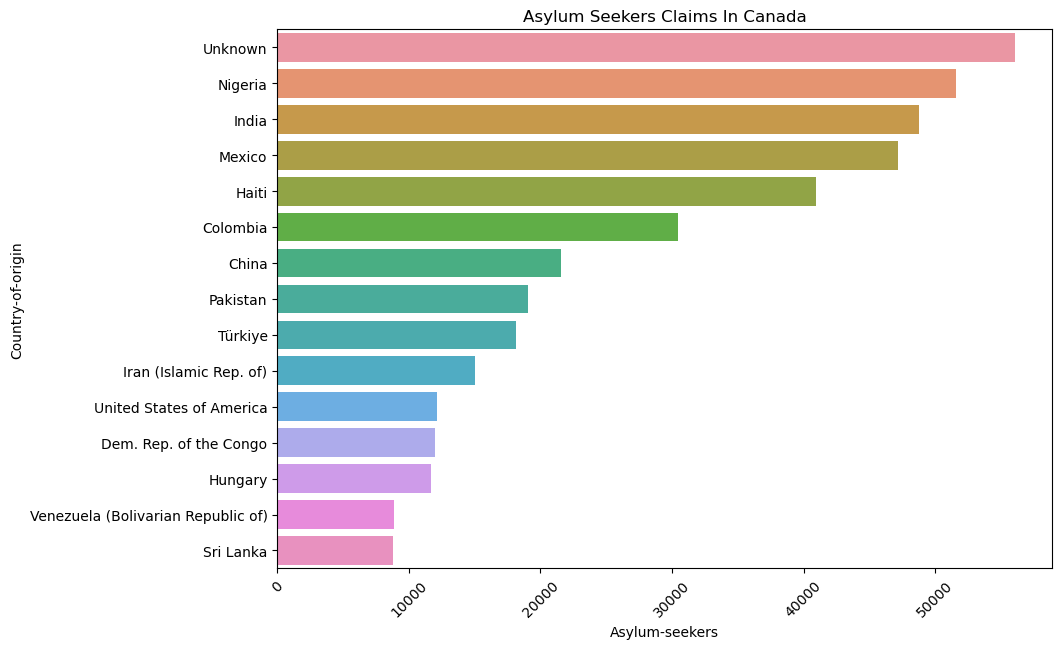

In [13]:
#What are the countries of origin for the majority of asylum claims made in Canada?

asylum_seeker = df['Asylum-seekers'].groupby(by= df['Country-of-origin']).sum().sort_values(ascending=False)[0:15].reset_index()


#visualizing the average by maker
plt.figure(figsize= (10,7))
sns.barplot(x='Asylum-seekers', y= 'Country-of-origin', data=asylum_seeker )
plt.title('Asylum Seekers Claims In Canada')
plt.xlabel('Asylum-seekers')
plt.ylabel('Country-of-origin')
plt.xticks(rotation= 45)
plt.show()

In [19]:
#What is the total number of asylum claims made in Canada every year?

total_asylum_per_year = df.groupby('Year')["Asylum-seekers"].sum().reset_index()
total_asylum_per_year

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


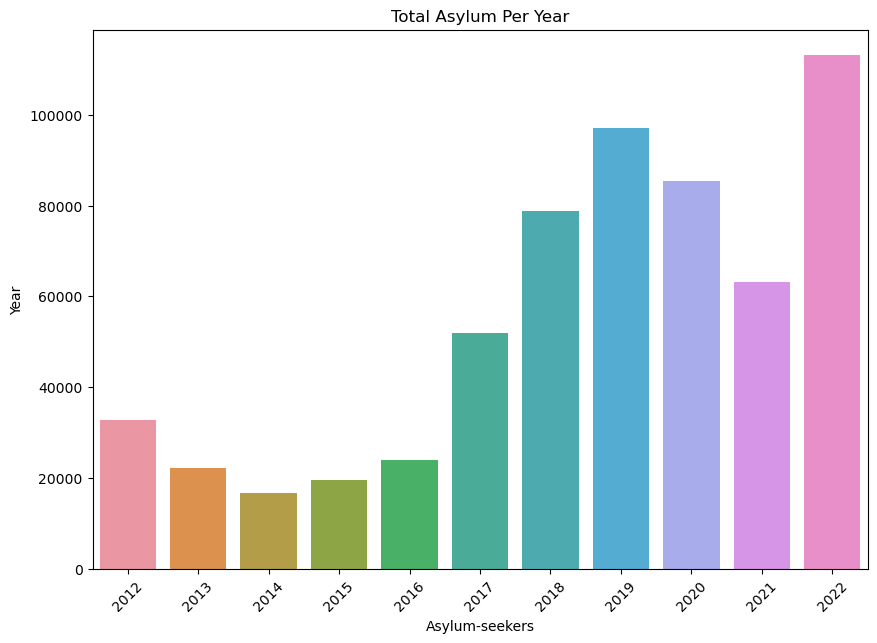

In [24]:
#visualizing the average by maker
plt.figure(figsize= (10,7))
sns.barplot(x= 'Year', y='Asylum-seekers', data=total_asylum_per_year )
plt.title('Total Asylum Per Year')
plt.xlabel('Asylum-seekers')
plt.ylabel('Year')
plt.xticks(rotation= 45)
plt.show()

In [25]:
# What are the general trends in refugee and asylum statistics from 2012-2022?
df['Asylum-seekers'].corr(df['UNHCR-refugees'])

0.27826653631264564

In [26]:
df['Asylum-seekers'].corr(df['Year'])

0.14423851840169524

In [27]:
df.corr()

C:\Users\Use\AppData\Local\Temp\ipykernel_13152\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


In [33]:
resettled_and_asylum_yrls =df.groupby('Year')[['UNHCR-refugees','Asylum-seekers']].sum().reset_index().sort_values('Year')
resettled_and_asylum_yrls

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [35]:
melted_data= pd.melt(resettled_and_asylum_yrls, id_vars=['Year'], var_name='counts')
melted_data

,Year,counts,value
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


In [36]:
plt.figure(figsize= (10,7))
sns.barplot(x= 'Year', y='counts',hue='Category' ,data=melted_data, palette='mako' )

plt.title('Total Refugees and Asylum Seekers Per Year')
plt.xlabel('Year')
plt.ylabel('Total Count')

plt.show()

ValueError: Could not interpret input 'Category'

<Figure size 1000x700 with 0 Axes>